## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


#### Useful Imports

In [4]:
import math
import numpy as np
import scipy.stats as stats

from scipy.stats import norm
import matplotlib.pyplot as pyplot
import matplotlib.mlab as mlab

# some nicer colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

%matplotlib inline

### 1. Is the distribution of body temperatures normal?

##### Histogram
We will first represent the probability density function of the data using an histogram. This will give us a first indication in order to know if the distribution is normal or not.

In addition, we will display an estimation of the probability density function of the data assuming that this data is normally distributed.

If the density line fits the histogram this will give us a first intuition if the distribution is normal or not.

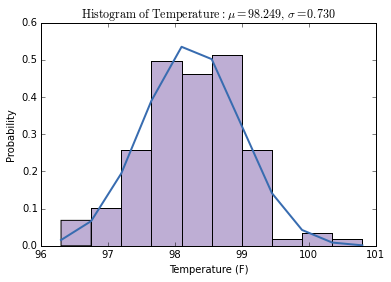

In [5]:
# Best fit of data
(mu, sigma) = norm.fit(df['temperature'])

# Histogram of the temperature data
n, bins, patches = pyplot.hist(df['temperature'], normed = True, color = COLOR2)

# Add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
l = pyplot.plot(bins, y, color = COLOR5, linewidth=2)

# Plot
pyplot.xlabel('Temperature (F)')
pyplot.ylabel('Probability')
pyplot.title(r'$\mathrm{Histogram\ of\ Temperature:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
pyplot.grid(False)

pyplot.show()

By looking at this graph, the shape of the distribution looks similar to what we can expect for a normal distribution. It is not perfect, but that was predictable.

##### Probability Plot
A more formal way of doing to verify if a data distribution follows some probability law is to use a probability plot or Q-Q plot. That is what I am going to try now.

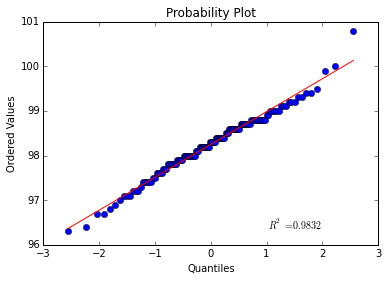

In [6]:
res = stats.probplot(df['temperature'], dist = "norm", plot = pyplot)
pyplot.show()

Most of the points seem to be align on the red line (which is the best fit line). In addition, the coefficient of regression is very close to one. This graph accentuates the fact that the data seems to be normally distributed.

##### Shapiro-Wilk Test
To confirm that once and for all, we are going to perform a Shapiro-Wilk test. This statistic test will enable us to conclude if the distribution is normal or not. Indeed, this is an hypothesis test which utilizes the null hypothesis principle to check whether a sample x1, ..., xn came from a normally distributed population.

In [7]:
W, p_value = stats.shapiro(df['temperature'])
print "Test statistic: ", W
print "p-value of the statistic test: ", p_value

Test statistic:  0.986577093601
p-value of the statistic test:  0.233174666762


The p-value is large. Therefore we are not going to reject the null hypothesis and we can conclude that the **distribution is normal**. 

### 2. Is the true population mean really 98.6 degrees F?

We will start by calculating the actual mean of the sample just to have an idea of the current value.

In [8]:
sample_mean = df['temperature'].mean()
print "Sample Mean: ", sample_mean

Sample Mean:  98.2492307692


The value obtained seems a bit lower than the announced value. It is closer to the 1992 revised value.

We will verify that using an hypothesis testing. As wedon't know the population standard deviation, the appropriate test is a **t-test**. This test is often used to determine if two sets of data are significantly different from each other when the data is normally distributed. We are going to do a one-sample location test of whether the mean of the population 98.6 degrees F. This will be our null hypothesis:

* H0: The mean of the population = 98.6 degrees F
* H1: The mean of the population != 98.6 degrees F

In [10]:
t, p_value = stats.stats.ttest_1samp(df['temperature'], 98.6)
print "Test statistic: ", t
print "p-value of the t-test: ", p_value

Test statistic:  -5.45482329236
p-value of the t-test:  2.41063204156e-07


The p-value is very small. Therefore, we are going to **reject the null hypothesis**, and then conclude that the true population mean is not equal to 98.6 degrees F.

As the sample size is large (n > 30) and the data normally distributed, we could have also used a z-test which will have estimated the population standard deviation by the sample standard deviation. We will use this in the next question.

### 3. At what temperature should we consider someone's temperature to be "abnormal"?

The standard deviation of the sample means quantifies the variability from one experiment to the next, and reflects the precision of the estimate.
This quantity is called the "standard error".

In [28]:
SE = df['temperature'].std()
print "Standard Error: ", SE

Standard Error:  0.733183158039


If we consider a 95% confidence interval, the critical z value is equal to 1.96. Considering this value, the **Margin of Error** is equal to:

In [29]:
ME = 1.96 * SE
print "Margin of Error: ", ME

Margin of Error:  1.43703898976


Knowing the margin of error we can deduce the **95% confidence interval**, we have: 

In [30]:
conf_int = np.percentile(df["temperature"], [2.5, 97.5])
print '95% Confidence Interval: ', conf_int

95% Confidence Interval:  [ 96.7225  99.4775]


All the values located outside of this interval will be considered as "abnormal".

### 4. Is there a significant difference between males and females in normal temperature?

We will first isolate the males temperatures on one side and the female temperature on the other side.

In [31]:
male_temp = df[df["gender"] == "M"]["temperature"]
female_temp = df[df["gender"] == "F"]["temperature"]

I will now compare the mean temperature of my two groups. This will be my test statistic.

To be able to know if there is a significant difference between males and females in normal temperature, I will use a two sample hypothesis testing. As the two groups are independent, I will use a t-test to determine whether the means of the two groups differ.

Here are my hypothesis:

* H0: Mean(males normal temperature) - Mean(females normal temperature) = 0
* H1: Mean(males normal temperature) - Mean(females normal temperature) != 0

In [32]:
statistic, p_value = stats.stats.ttest_ind(male_temp, female_temp)
print "Test statistic: ", statistic
print "p-value of the t-test: ", p_value

Test statistic:  -2.28543453817
p-value of the t-test:  0.0239318831224


This time again we will use 5% as a threshold for our hypothesis testing. We have a p-value < 5%, therefore we are going to reject the null hypothesis and assume that there is a significant difference between the males and females normal temperature.

However, the p-value is not very small (p-value > 1%), so the result is less significant than the one obtained question 2. for instance. There is still a risk (2.4%) to commit a type 1 error.